##Preliminaries

In [45]:
import pandas as pd
import numpy as np
%matplotlib inline

##Questions

####1. Use the file [bank.csv](bank.csv) to explore the dataset. Observe the features: Are they numbers? Are they strings? Are they binary? Are they continuous?

In [4]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [28]:
bank.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [9]:
bank.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
dtype: int64

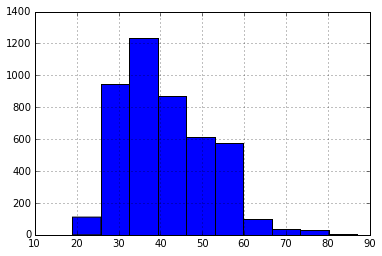

In [14]:
bank.age.hist()

####2. Learn about label encoders at the following link and use what you learn to transform the features to numerical features. [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def convert_labels(data):
    for col_name in data.columns:
        col = data[col_name]
        if col.dtype == 'O':
            labels = col.unique()
            le.fit(labels)
            data[col_name] = le.transform(col)
    return data

In [32]:
bank_converted = convert_labels(bank)

In [33]:
bank_converted.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0

####3. Build a decision tree model to predict whether a prospect will buy the product.

In [37]:
# select feature columns (every column except for the 0th column)
feature_cols = bank_converted.columns[:-1]
feature_cols

Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome'], dtype='object')

In [38]:
# define X (features) and y (response)
X = bank_converted[feature_cols]
y = bank_converted.y

In [39]:
# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
# print out each of the arrays
print X_train
print y_train
print X_test
print y_test

[[40  1  1 ..., -1  0  3]
 [53  2  1 ..., -1  0  3]
 [43  4  2 ..., -1  0  3]
 ..., 
 [28  7  2 ..., -1  0  3]
 [45  1  1 ..., -1  0  3]
 [48  9  0 ..., -1  0  3]]
[0 0 0 ..., 1 0 0]
[[32  0  2 ..., -1  0  3]
 [46  1  1 ..., -1  0  3]
 [50  1  1 ..., -1  0  3]
 ..., 
 [46  2  1 ..., -1  0  3]
 [47  4  1 ..., -1  0  3]
 [37  4  1 ..., -1  0  3]]
[0 0 0 ..., 0 0 0]


In [41]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           random_state=1, splitter='best')

####4. Evaluate the accuracy of your decision tree model using cross validation.

In [42]:
# make predictions
preds = treereg.predict(X_test)

# print predictions and actual values
print preds
print y_test

[ 0.  0.  0. ...,  0.  0.  0.]
[0 0 0 ..., 0 0 0]


In [43]:
# use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

In [46]:
# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.29583596867263856

####5. Repeat the analysis and cross validation with the file bank-additional-full.csv. How does the performance of the model change (with the additional training examples and additional features)?

In [51]:
bank_full = pd.read_csv('bank-additional-full.csv', sep=';')
bank_full.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857         5191  no  
1          93.994          -36.4      4.857         5191  no  
2          93.994          -36.4      4.857         5191  no  
3          93.994          -36.4      4.857         5191  no  
4          93.994          -36.4      4.857         5191  no  

[5 rows x 21 columns]

In [52]:
bank_full.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [63]:
#0. convert labels to numerical values
bank_full_converted = convert_labels(bank_full)

In [59]:
#1a. select features
feature_cols = bank_full_converted.columns[:-1]

#1b. define X (features) and y (response)
X = bank_full_converted[feature_cols]
y = bank_full_converted.y

#2. train-test-split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#3. import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

#4.  make predictions
preds = treereg.predict(X_test) 

#5. use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

In [60]:
# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.27433899244267668

In [61]:
# try max_depth=3
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.26658988759105218

In [62]:
# try max_depth=4
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.26847446761691007